# Data Preprocessing

In [44]:
%matplotlib inline
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

# Import data
filename="./Concrete_Data.csv"
df = pd.read_csv(filename)
print(df.keys())

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')


# Split Data into 80/20

In [45]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
print(len(train))
print(len(test))
# train_feature=train[train.columns[0:8]]
# train_target=train[train.columns[8:9]]
# test_feature=test[test.columns[0:8]]
# test_target=test[test.columns[8:9]]
# print(train_feature)
# print(train_target)
print(df.columns[0:1])

824
206
Index(['Cement'], dtype='object')


# Plot all features

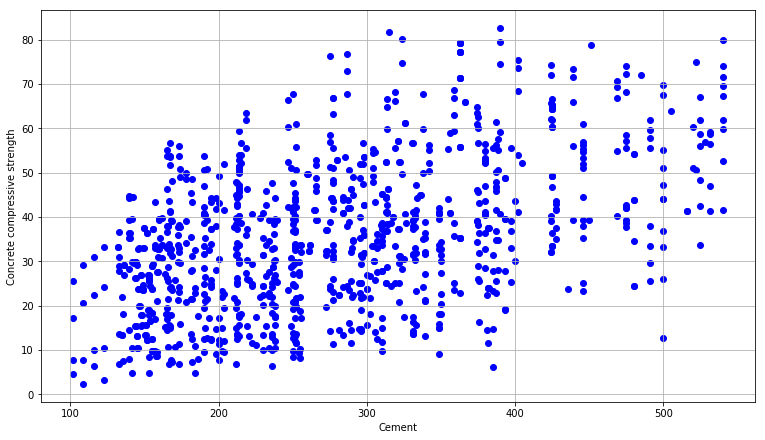

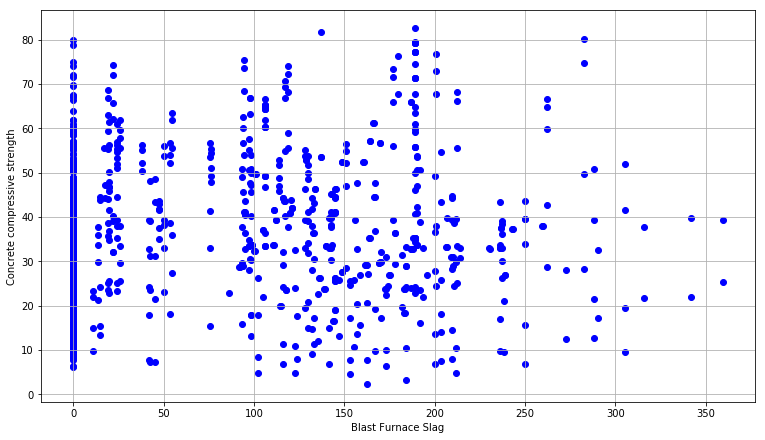

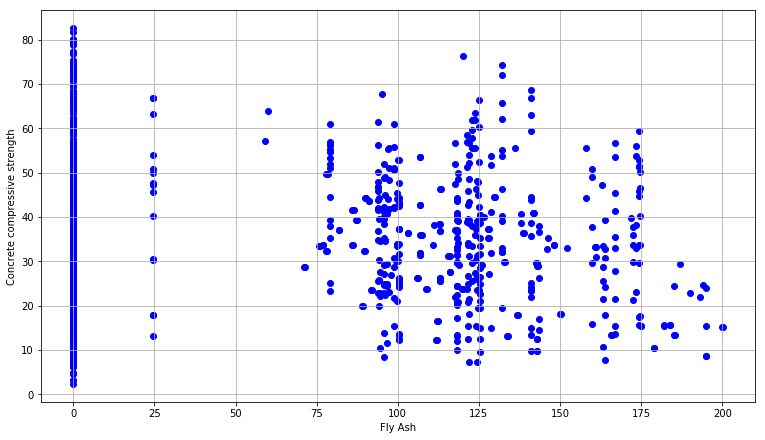

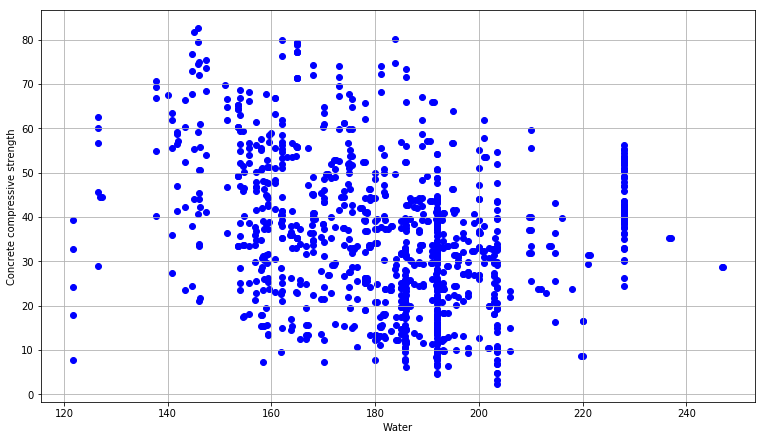

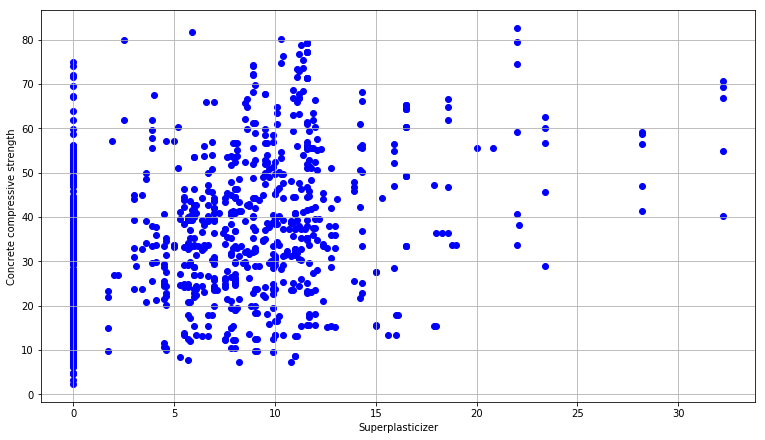

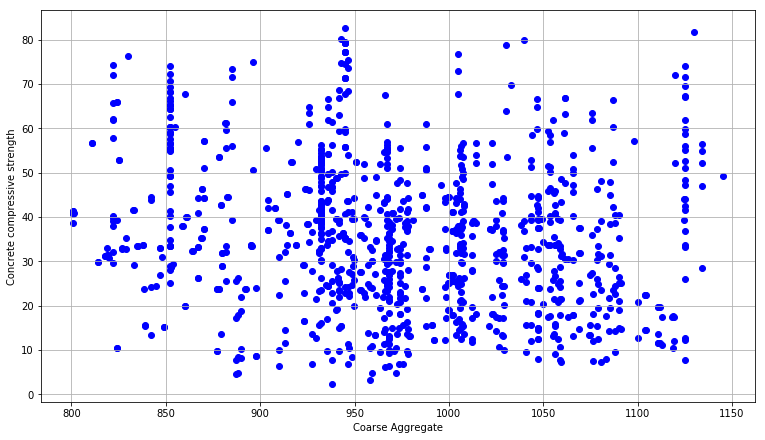

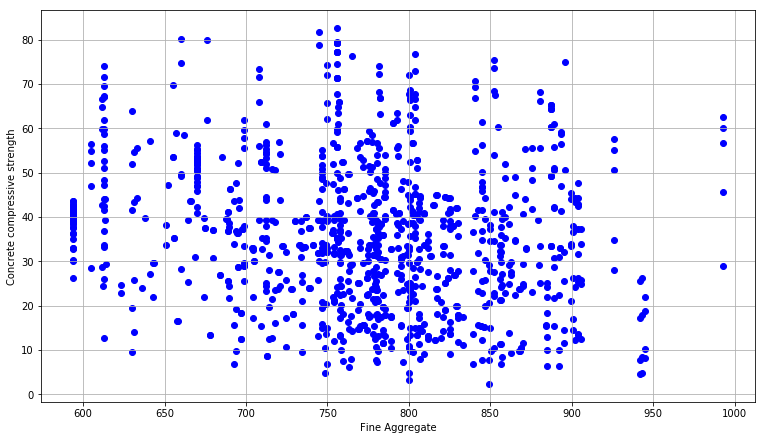

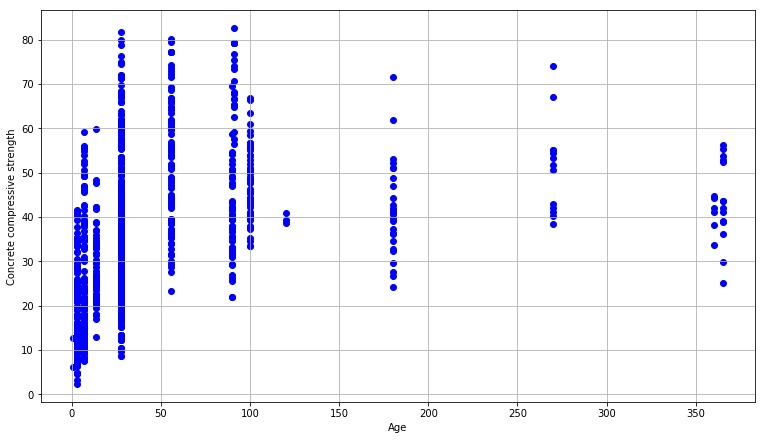

In [46]:
# Plot outputs
for i in range(len(df.keys())-1):
    plt.figure(figsize=(12.8,7.2))
    plt.scatter(df[df.columns[i]],df[df.columns[8]],  color='blue')
    plt.xlabel(df.columns[i])
    plt.ylabel(df.columns[8])
    
    plt.grid()
    plt.show()

# Linear Regression with single variable

Iteration i =  0
Iteration i =  1
Iteration i =  2
Iteration i =  3
Iteration i =  4
Iteration i =  5
Iteration i =  6
Iteration i =  7


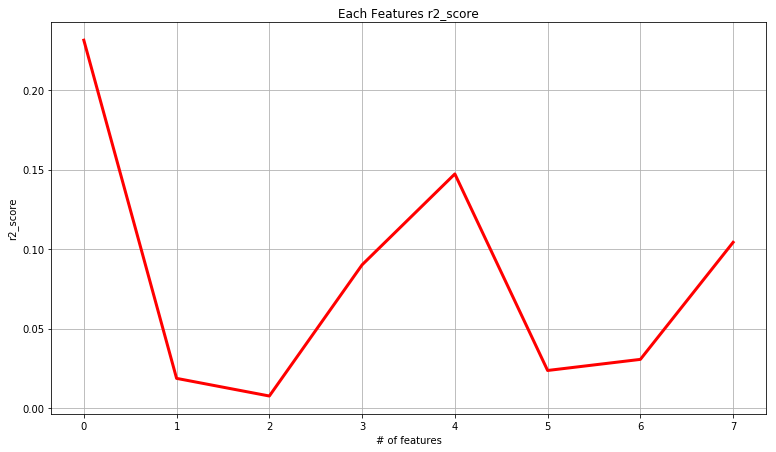

R2_score =  0.3087976765076258
Weight :  [[0.0771074]]
Bias :  [14.20301445]


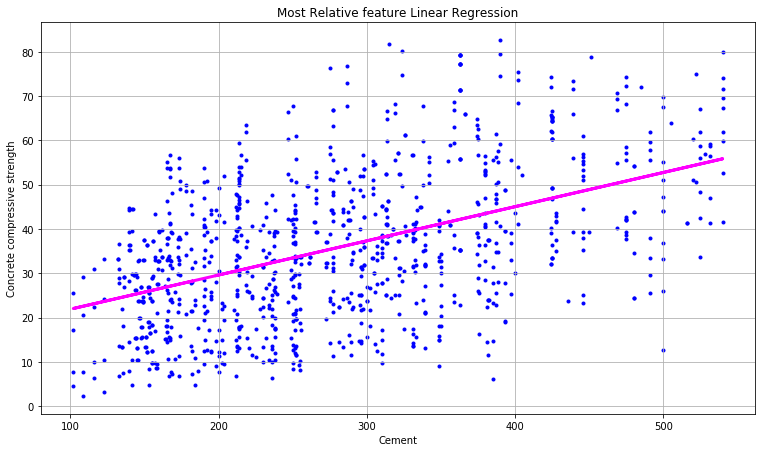

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_score=[]
for i in range(len(train.keys())-1):
    print("Iteration i = ",i)
    regr = LinearRegression()
    train_feature=train[train.columns[i:i+1]]
    train_target=train[train.columns[8:9]]
    test_feature=train[test.columns[i:i+1]]
    test_target=train[test.columns[8:9]]
    regr.fit(train_feature,train_target)
    r2_score+=[regr.score(test_feature,test_target)]
#     print('Accuracy = ',regr.score(test_feature,test_target))
#     print('Coefficients : ', regr.coef_)
#     print('intercept : ',regr.intercept_ )

#plot all features r2_score
index=[0,1,2,3,4,5,6,7]
plt.figure(figsize=(12.8,7.2))
plt.plot(index,r2_score, color='red', linewidth=3)
plt.xlabel('# of features')
plt.ylabel('r2_score')
plt.title('Each Features r2_score')
plt.grid()
plt.show()

#Find max r^2
idx=r2_score.index(max(r2_score))
regr = LinearRegression()
train_feature=train[train.columns[idx:idx+1]]
train_target=train[train.columns[8:9]]
test_feature=test[test.columns[idx:idx+1]]
test_target=test[test.columns[8:9]]
regr.fit(train_feature,train_target)
r2_score+=[regr.score(test_feature,test_target)]
print('R2_score = ',regr.score(test_feature,test_target))
print('Weight : ', regr.coef_)
print('Bias : ',regr.intercept_ )

#plot most relative feature
plt.figure(figsize=(12.8,7.2))
plt.scatter(df[df.columns[idx]],df[df.columns[8]],  color='blue',marker='.')
plt.plot(test_feature,regr.predict(test_feature), color='magenta', linewidth=3)
plt.xlabel(df.columns[idx])
plt.ylabel(df.columns[8])
plt.title('Most Relative feature Linear Regression')
plt.grid()
plt.show()

# Single Variable with own gradient decent

In [48]:
#Gradient descent algorithm for linear regression
from numpy import *

# minimize the "sum of squared errors". 
#This is how we calculate and correct our error
def compute_error_for_line_given_points(b,m,points):
    totalError = 0 
    for i in range (0, len(points)):
        x = points[i][0]
        y = points[i][1]
        totalError += (y-(m*x + b)) ** 2
    return totalError/ float(len(points))

def step_gradient(b_current, m_current, points, learning_rate):
    #gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i][0]
        y = points[i][1]
        b_gradient += -(2/N) * (y - (m_current * x + b_current))
        m_gradient += -(2/N) * x * (y - (m_current * x + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient) 
    return [new_b,new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iteartions):
    b = starting_b
    m = starting_m
    for i in range(num_iteartions):
        b,m = step_gradient(b, m, array(points), learning_rate)
    return [b,m]

#Step 1: Collect the data
# points = list(zip(df[df.columns[idx]],df[df.columns[8]]))
points=list(zip(train[train.columns[idx]],train[df.columns[8]]))
#Step 2: Define our Hyperparameters
learning_rate = 0.00001 #how fast the data converge
#y=mx+b (Slope formule)
initial_b = 10 
initial_m = 1 
num_iterations = 10000
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
print("Running...")
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

Starting gradient descent at b = 10, m = 1, error = 75370.31254065534
Running...
After 10000 iterations b = 10.095992904137837, m = 0.08990147549339458, error = 215.17857639592543


# r2_score and Visualization

In [49]:
from sklearn.metrics import r2_score
predict_target=[]
for i in range(len(test[test.columns[idx:idx+1]])):
    predict_target+=[test[test.columns[idx:idx+1]].values[i]*m+b]
predict_target2 = pd.DataFrame({'test':predict_target})
target=pd.DataFrame(test[test.columns[8:9]])
# print(predict_target2)
# print(target)
# print(len(predict_target2))
# print(len(target))
score=r2_score(target,predict_target2)
# score=r2_score(predict_target2,target)
print("r2_score is = ",score)

r2_score is =  0.3143521778829017


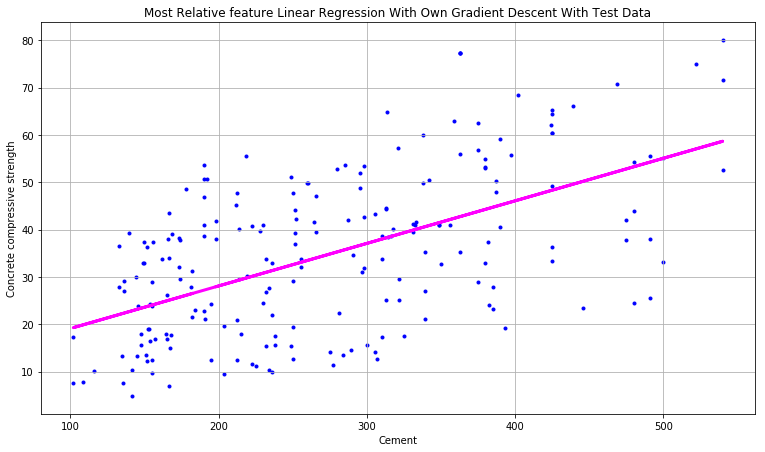

In [50]:
#plot most relative feature
plt.figure(figsize=(12.8,7.2))
# plt.scatter(df[df.columns[idx]],df[df.columns[8]],  color='blue',marker='.')
# plt.plot(df[df.columns[idx]],predict_target2, color='magenta', linewidth=3)
plt.scatter(test[test.columns[idx:idx+1]],test[test.columns[8:9]],  color='blue',marker='.')
plt.plot(test[test.columns[idx:idx+1]],predict_target2, color='magenta', linewidth=3)
plt.xlabel(df.columns[idx])
plt.ylabel(df.columns[8])
plt.title('Most Relative feature Linear Regression With Own Gradient Descent With Test Data')
plt.grid()
plt.show()